<h1>Predicting Term Deposit Subscriptions in Direct Marketing Campaigns</h1>
In this project, we analyze data from a banking institution’s direct marketing campaigns. 

The dataset can be downloaded from <a href="https://archive.ics.uci.edu/dataset/222/bank+marketing">UCI Machine Learning Repository</a><br>

[1. Imports and Reading Data](#cell_1)<br>
[2. Data Understanding](#cell_2)<br>
[3. Data Preparation](#cell_3)<br>
[4. Exporatory Data Analysis](#cell_4)<br>
[5. Oversampling](#cell_5)<br>
[6. Model Preparation](#cell_6)<br>

<h2>Imports and Reading Data</h2>
<a id = "cell_1"></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h2>Data Understanding</h2>
<a id = "cell_2"></a>

In [3]:
df.shape

(45211, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h2>Data Preparation</h2>
<a id="cell_3"></a>

In [3]:
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
job  :  [ 4  9  2  1 11  5  0  7  6 10  3  8]  =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  :  [1 2 0]  =  ['married' 'single' 'divorced']
education  :  [2 1 3 0]  =  ['tertiary' 'secondary' 'unknown' 'primary']
default  :  [0 1]  =  ['no' 'yes']
housing  :  [1 0]  =  ['yes' 'no']
loan  :  [0 1]  =  ['no' 'yes']
contact  :  [2 0 1]  =  ['unknown' 'cellular' 'telephone']
month  :  [ 8  6  5  1 10  9  2  4  3  7  0 11]  =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  :  [3 0 1 2]  =  ['unknown' 'failure' 'other' 'success']
y  :  [0 1]  =  ['no' 'yes']


In [4]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [5]:
col = list(df1.columns)
categorical_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]
numerical_features = [i for i in list(df.columns) if i in list(df.describe().columns)]

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Features : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


C:\Users\divya\AppData\Local\Temp\ipykernel_10756\1449608779.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not-Subbed Customers','Subbed Customers'])


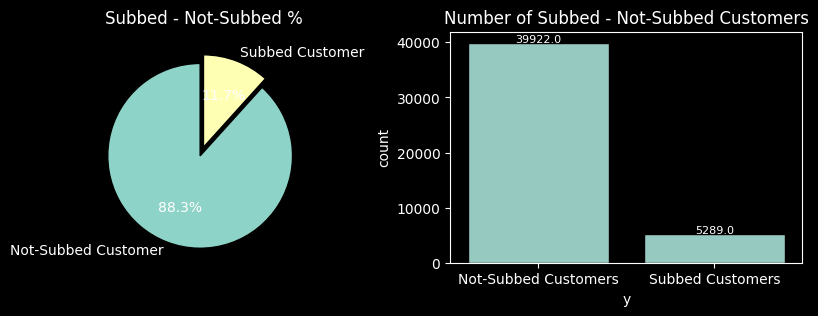

In [6]:
l = list(df1['y'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,3))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Subbed Customer','Subbed Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Subbed - Not-Subbed %')

plt.subplot(1,2,2)
ax = sns.countplot(x = 'y',data = df,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 8)
ax.set_xticklabels(['Not-Subbed Customers','Subbed Customers'])
    
plt.title('Number of Subbed - Not-Subbed Customers')
plt.show()

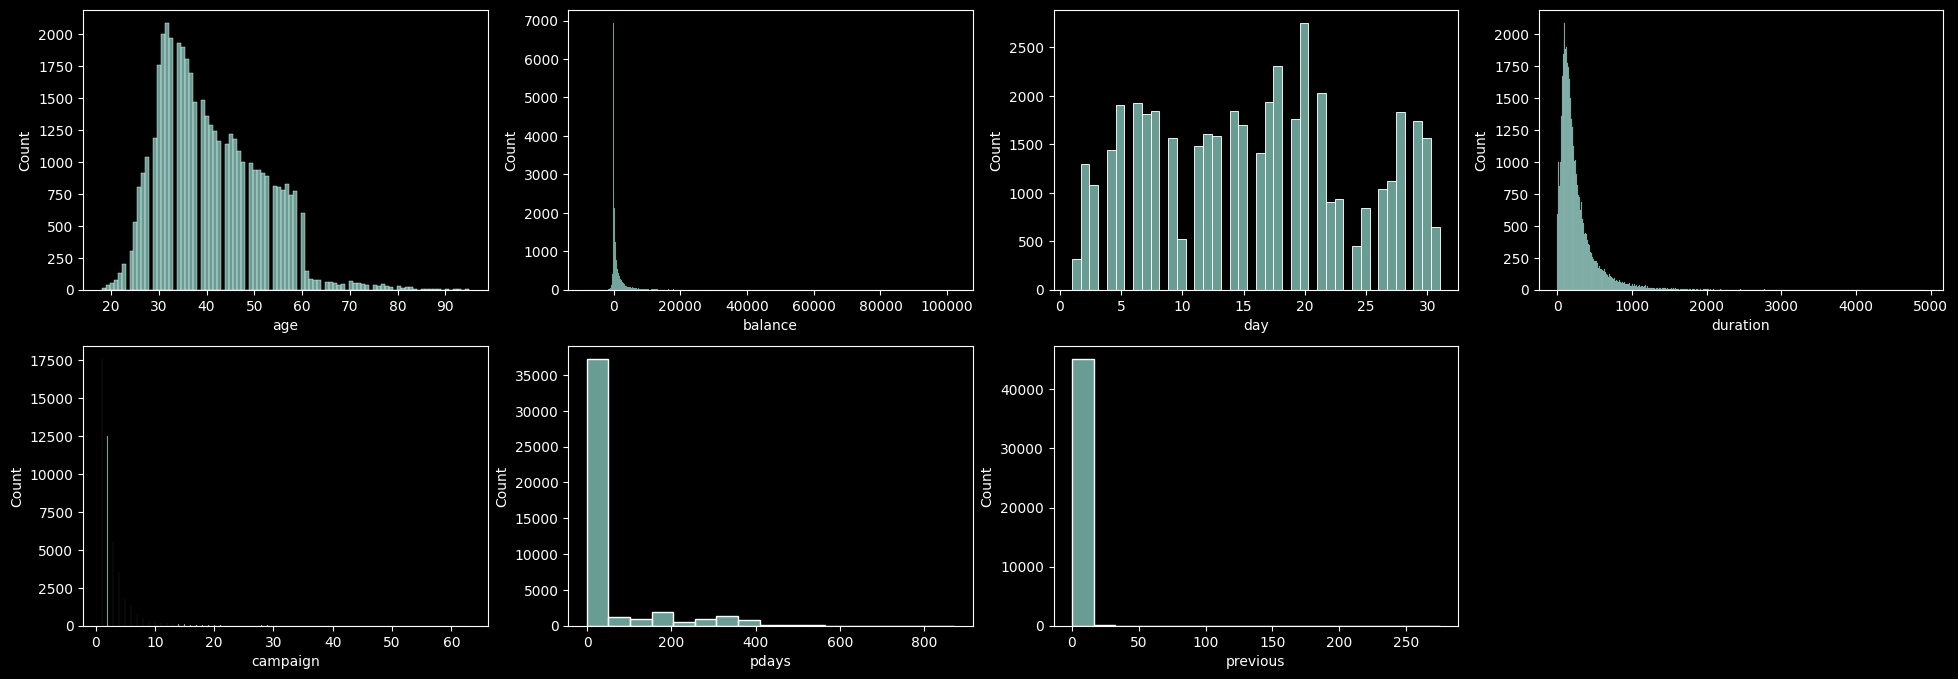

In [7]:
plt.figure(figsize=(24,8))
for i,col in enumerate(numerical_features):
    plt.subplot(2,4,i+1)
    sns.histplot(df1[col])

In [8]:
mms = MinMaxScaler()
for col in numerical_features:
    df1[col] = mms.fit_transform(df1[[col]])

<h2>Exploratory Data Analysis</h2>
<a id="cell_4"></a>

Text(0.5, 1.0, 'Correlation w.r.t Outcome')

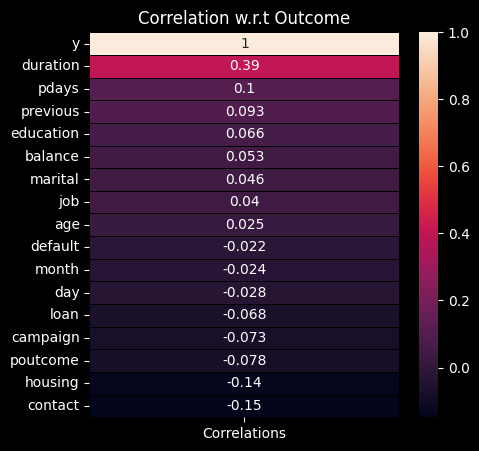

In [10]:
corr = df1.corrwith(df1['y']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t Outcome')

Text(0.5, 1.0, 'Selection of Categorical Features')

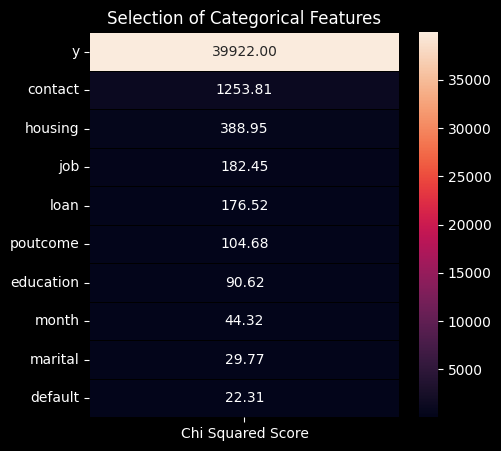

In [11]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'y']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plt.title('Selection of Categorical Features')

Text(0.5, 1.0, 'Selection of Numerical Features')

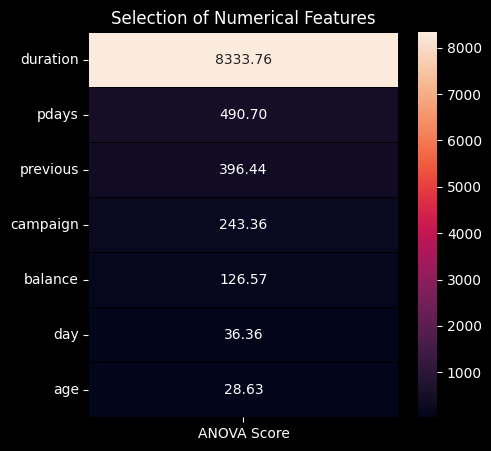

In [12]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'y']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plt.title('Selection of Numerical Features')

<h2>Oversampling</h2>
<a id="cell_5"></a>

In [13]:
df1['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [14]:
f1 = df1.iloc[:,:-1].values
t1 = df1.iloc[:,-1].values

In [15]:
over = SMOTE(sampling_strategy = 1)
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 39922, 1: 39922})

<h2>Model Preparation</h2>
<a id="cell_6"></a>

In [16]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [17]:
def model_evaluation(classifier,x_test,y_test):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    print(classification_report(y_test,classifier.predict(x_test)))

In [38]:
classifier = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 1)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=1000)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      8056
           1       0.86      0.90      0.88      7913

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



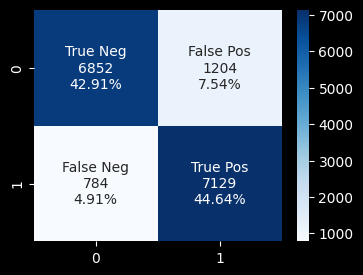

In [39]:
model_evaluation(classifier,x_test,y_test)

In [40]:
feature_importance = pd.DataFrame(classifier.feature_importances_, index = df1.columns[:-1]).sort_values(0, ascending=False)
feature_importance

,0
duration,0.487015
contact,0.101737
housing,0.086879
campaign,0.080664
month,0.062149
pdays,0.037162
balance,0.035138
previous,0.027264
day,0.017939
poutcome,0.017458
